# Nagel Schreckenberg simulation

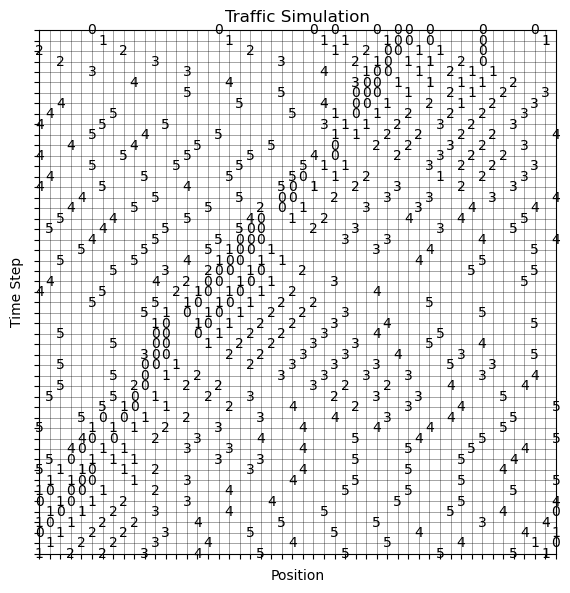

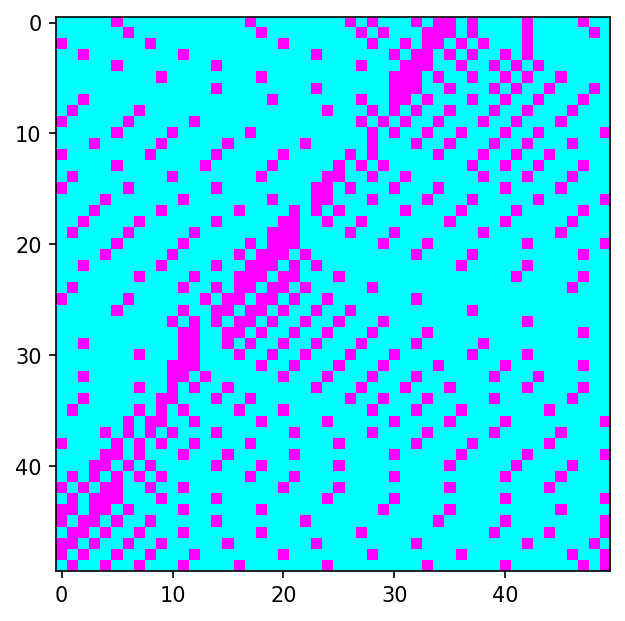

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functions

tmax = 50
L = 50
N = 10
vmax = 5
p = 0.2

simulation = functions.Nagel_Schreckenberg(L, N, vmax, p, tmax)[0]
functions.plot_simulation(simulation)


points = np.zeros((tmax, L))
for i in range(L):
    for j in range(tmax):
        if simulation[j][i] > -1:
            points[j][i] = 1
        else:
            points[j][i] = 0

plt.figure(dpi=150)
plt.imshow(points, cmap = "cool", interpolation = "nearest")
plt.show()

# Flow vs density

The time-averaged flow q between i and i+1 is $q = \frac{1}{T}\sum_{t=t_0+1}^{t_0+T}n_{i,i+1}(t)$

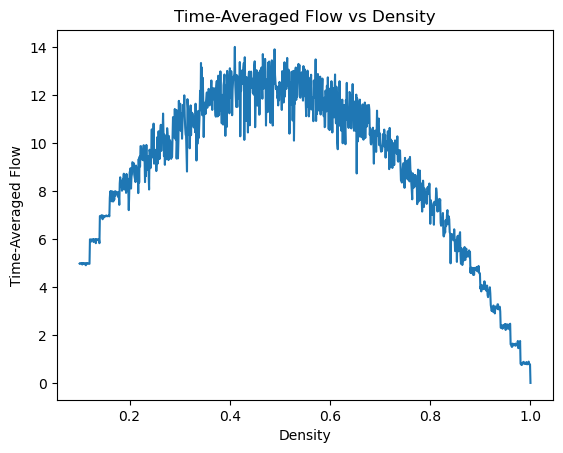

In [2]:

# Parameters
L = 50  # number of cells in row
t_max = 100  # number of iterations
v_max = 5
p = 0.2
N = 10
densities = np.linspace(0.1, 1.0, 1000)

flow_vs_density = []

for density in densities:
    flow_counts = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)[1]
    time_averaged_flow = functions.calculate_time_averaged_flow(flow_counts, t_max)
    flow_vs_density.append(time_averaged_flow)

# Plotting
plt.plot(densities, flow_vs_density)
plt.xlabel('Density')
plt.ylabel('Time-Averaged Flow')
plt.title('Time-Averaged Flow vs Density')
plt.show()


# Cluster distribution 

(a way of measuring the amount of traffic)

The below plot (visually) shows that the clusters fluctuate a lot but overall neither increase nor decrease.

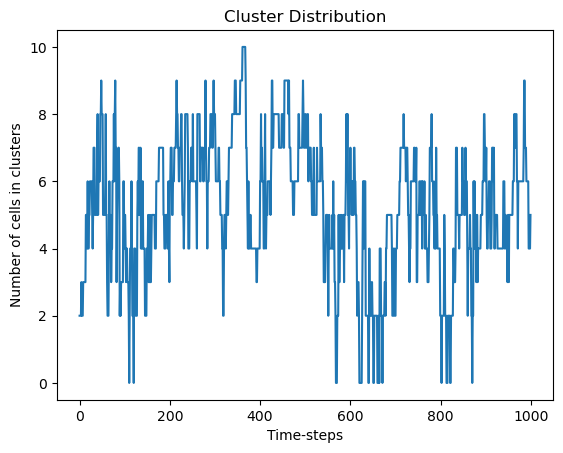

The average number of cells in clusters at one time is 5.193 .
This corresponds to 51.92999999999999 percent of cars stuck in traffic.


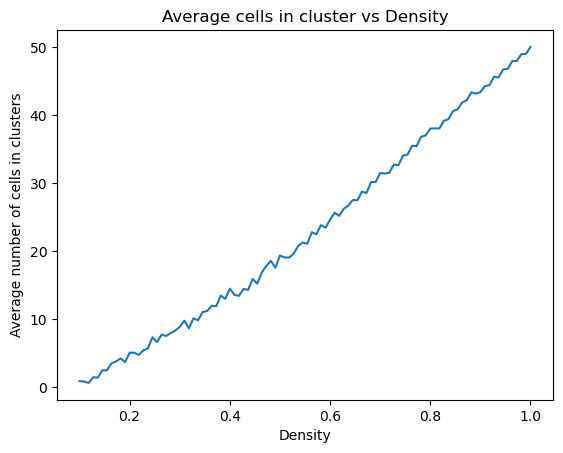

In [21]:
# Parameters
L = 50  
N = 10
v_max = 5
p = 0.8
t_max = 1000

cluster_distribution = functions.Nagel_Schreckenberg(L, N, v_max, p, t_max)[2]
    
# Plotting
plt.plot(range(t_max), cluster_distribution)
plt.xlabel('Time-steps')
plt.ylabel('Number of cells in clusters')
plt.title('Cluster Distribution')
plt.show()



'''Average number of clusters and its variation for a fixed density'''

# Calculate the average
average_cells_in_clusters = np.mean(cluster_distribution)
percentage_in_traffic = 100*average_cells_in_clusters/N

print("The average number of cells in clusters at one time is", average_cells_in_clusters,".") 
print("This corresponds to", percentage_in_traffic, "percent of cars stuck in traffic.")

# Calculate the variance
variance = np.var(cluster_distribution)




'''Plot of cluster averages and their variances over varied densities
-> i still gotta add the variance:)
'''

densities = np.linspace(0.1, 1.0, 100)

cluster_averages = []

for density in densities:
    cluster_list = functions.Nagel_Schreckenberg(L, int(L * density), v_max, p, t_max)[2]
    cluster_average = np.mean(cluster_list)
    cluster_averages.append(cluster_average)

# Plotting
plt.plot(densities, cluster_averages)
plt.xlabel('Density')
plt.ylabel('Average number of cells in clusters')
plt.title('Average cells in cluster vs Density')
plt.show()
